<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

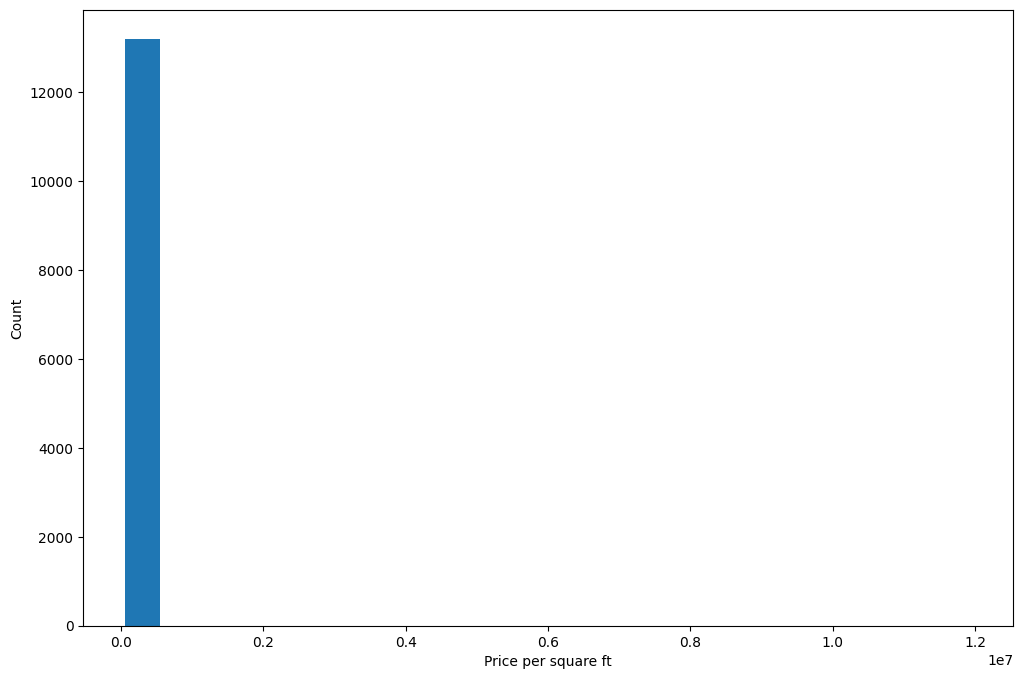

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

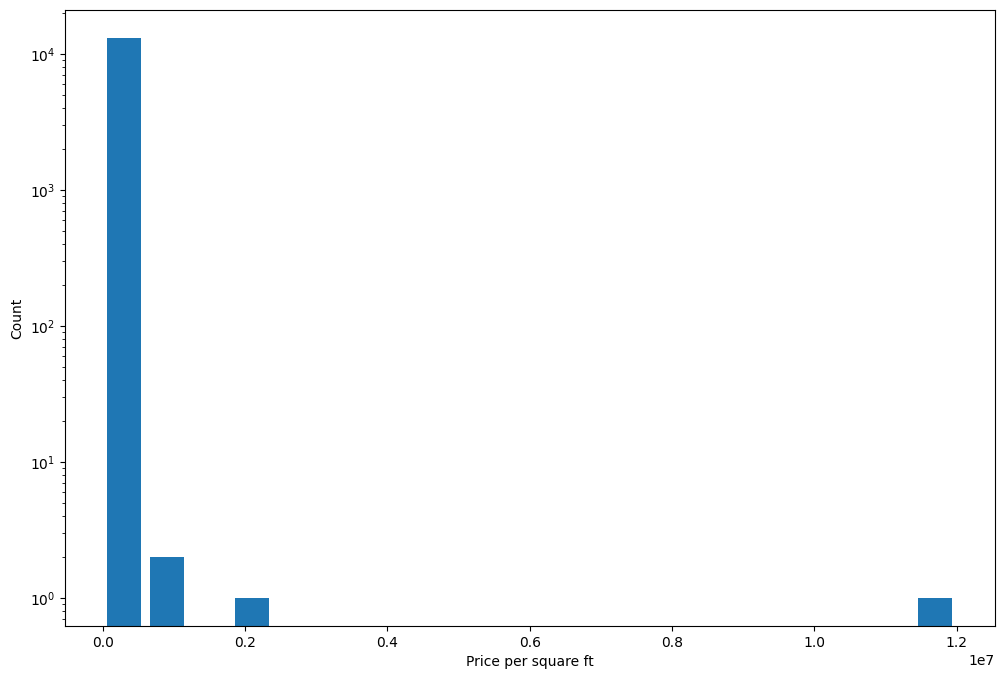

In [8]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [9]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [10]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5343,other,9 BHK,42000.0,8.0,175.0,9,416
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
1005,other,1 BHK,15.0,1.0,30.0,1,200000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
345,other,3 Bedroom,11.0,3.0,74.0,3,672727


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [11]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [14]:
df.shape

(13200, 7)

In [15]:
df2.shape

(13172, 7)

In [16]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [17]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [18]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000
5315,Banashankari Stage II,4 Bedroom,1500.0,2.0,650.0,4,43333
8650,HAL 2nd Stage,4 Bedroom,2400.0,4.0,650.0,4,27083
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148
9808,Uttarahalli,6 Bedroom,1200.0,6.0,330.0,6,27500
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666


In [19]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [20]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

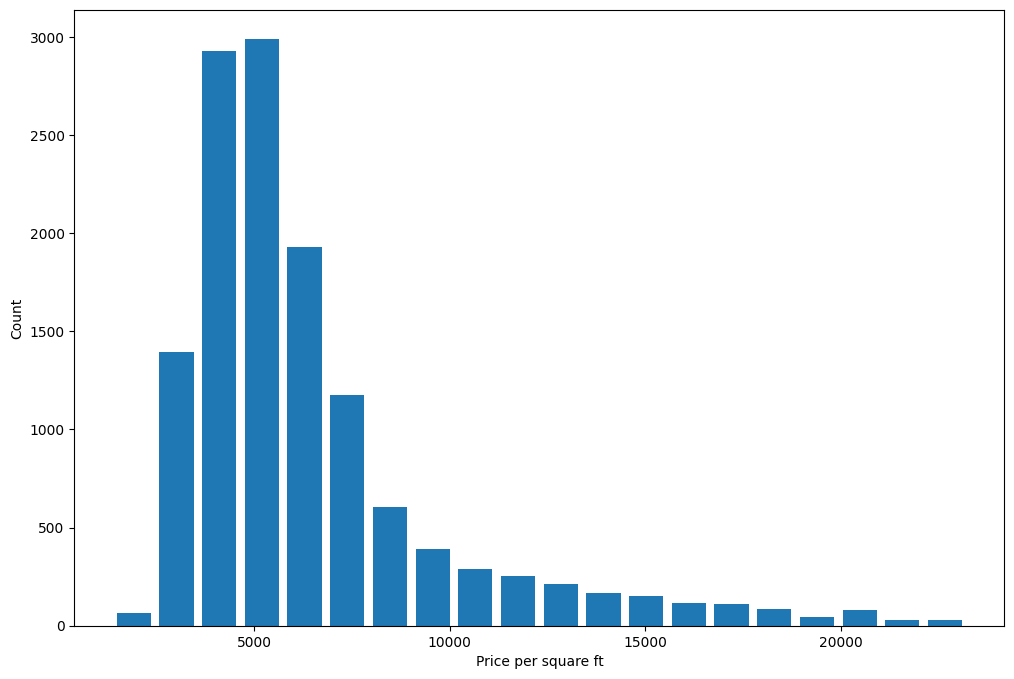

In [21]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

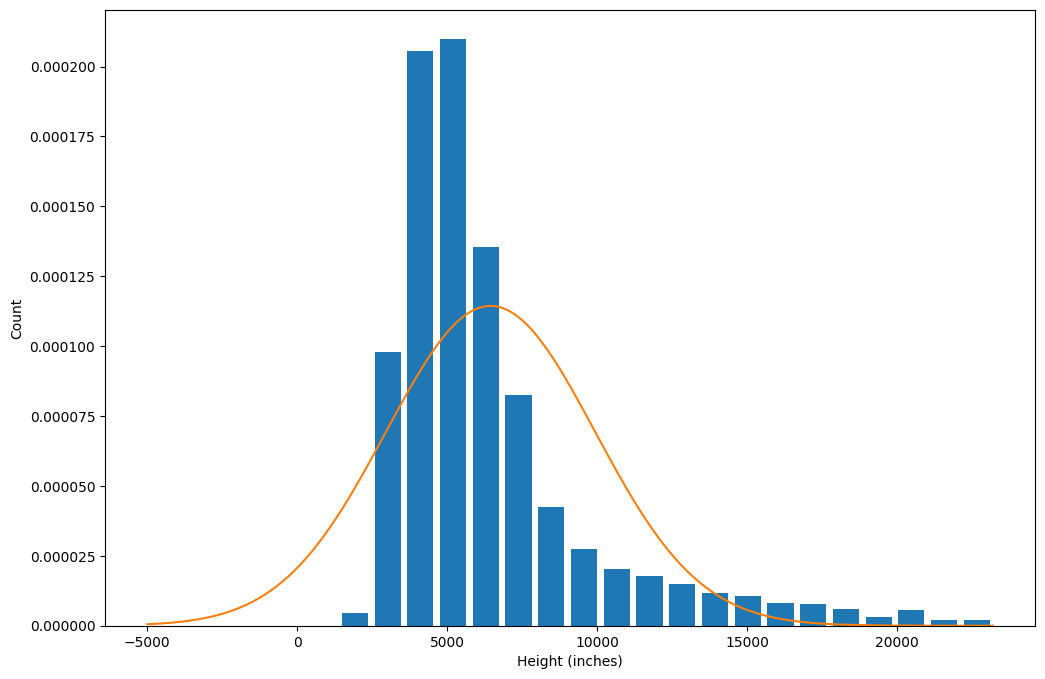

In [23]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [27]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10566,HSR Layout,2 BHK,1140.0,2.0,46.00,2,4035,-0.634784
4742,other,3 BHK,1402.0,2.0,85.00,3,6062,-0.145291
12157,Kanakpura Road,3 BHK,1570.0,3.0,68.00,3,4331,-0.563304
3135,Electronic City,2 BHK,1000.0,2.0,22.00,2,2200,-1.077911
3132,Narayanapura,2 BHK,1308.0,2.0,92.66,2,7084,0.101508
11656,Sector 7 HSR Layout,3 BHK,1760.0,3.0,185.00,3,10511,0.929082
7362,Mallasandra,4 BHK,1810.0,3.0,57.00,4,3149,-0.848741
702,Koramangala,3 BHK,1580.0,3.0,160.00,3,10126,0.836109
8328,Kanakpura Road,2 BHK,1204.0,2.0,82.00,2,6810,0.035341
13042,other,1 BHK,530.0,1.0,18.00,1,3396,-0.789094


In [28]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [29]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333,4.025420
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166,5.434010
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000,5.635409
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000,5.635409


In [30]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [31]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation